In [1]:
#!pip install git+https://github.com/octosport/octopy.git

!ls -l

total 1680
-rw-r--r--   1 toni  staff    9271 Dec 15 21:53 Building_a_Simple_Football_Prediction_Model_Using_Machine_Learning.ipynb
-rw-r--r--@  1 toni  staff  391979 Dec 15 22:28 Generate_Octopy_ELO_Features.ipynb
-rw-r--r--   1 toni  staff  225685 Dec 15 21:48 Liga_Rating_and_Predicting_Liga_with_Recurrent_Neural_Network_and JAX.ipynb
-rw-r--r--   1 toni  staff  224148 Dec 15 22:34 Rating_and_Predicting_Football_with_Recurrent_Neural_Network_and JAX.ipynb
drwxr-xr-x  10 toni  staff     320 Oct 25 21:39 octopy


In [12]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from octopy.elo import dataset
from octopy.elo import elo

#get the data
#data = pd.read_csv('https://raw.githubusercontent.com/octosport/octopy/master/data/epl.csv')
data = pd.read_csv('../data/jax_elo_dataset.csv')

#format the data
elo_data = dataset.EloDataset(valid_date= '2019-08-01',test_date= '2021-08-01',time= data['date'])

#split the data
elo_data.split_train_test(data[['home','away']].values,data[['home_goals','away_goals']].values)

#build the model and train
model = elo.EloRatingNet(elo_data.n_teams_)
model.optimise(elo_data,learning_rate=0.01)

dataset split using date: train size 1140, validation size 760, test size 86


  0%|          | 0/10000 [00:00<?, ?it/s]

train_loss: 1.1169, valid_loss: 1.1692, test_loss: 1.1951
train_loss: 1.0286, valid_loss: 1.0667, test_loss: 1.0811
train_loss: 1.0180, valid_loss: 1.0554, test_loss: 1.0669
train_loss: 1.0153, valid_loss: 1.0528, test_loss: 1.0630
train_loss: 1.0145, valid_loss: 1.0520, test_loss: 1.0616
train_loss: 1.0142, valid_loss: 1.0517, test_loss: 1.0609
train_loss: 1.0140, valid_loss: 1.0516, test_loss: 1.0605
train_loss: 1.0139, valid_loss: 1.0515, test_loss: 1.0603
train_loss: 1.0139, valid_loss: 1.0514, test_loss: 1.0601
train_loss: 1.0138, valid_loss: 1.0513, test_loss: 1.0600
train_loss: 1.0137, valid_loss: 1.0512, test_loss: 1.0599
train_loss: 1.0137, valid_loss: 1.0512, test_loss: 1.0598
train_loss: 1.0135, valid_loss: 1.0510, test_loss: 1.0596
train_loss: 1.0134, valid_loss: 1.0509, test_loss: 1.0595
train_loss: 1.0133, valid_loss: 1.0509, test_loss: 1.0594
train_loss: 1.0133, valid_loss: 1.0508, test_loss: 1.0594
train_loss: 1.0132, valid_loss: 1.0508, test_loss: 1.0593
train_loss: 1.

In [13]:
data.describe

<bound method NDFrame.describe of             date        home        away  home_goals  away_goals
0     2016-08-19   Deportivo       Eibar           2           1
1     2016-08-19      Malaga     Osasuna           1           1
2     2016-08-20     Granada  Villarreal           1           1
3     2016-08-20     Sevilla     Espanol           6           4
4     2016-08-20   Barcelona       Betis           6           2
...          ...         ...         ...         ...         ...
1981  2021-10-17  Villarreal     Osasuna           1           2
1982  2021-10-17   Barcelona    Valencia           3           1
1983  2021-10-17       Celta     Sevilla           0           1
1984  2021-10-18      Alaves       Betis           0           1
1985  2021-10-18     Espanol       Cadiz           2           0

[1986 rows x 5 columns]>

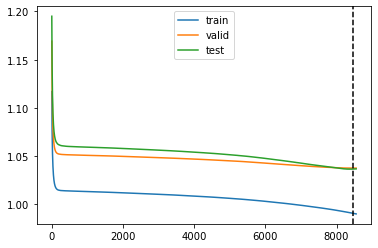

In [14]:
#plot the path loss
pd.DataFrame(model.loss_path_,columns=['train','valid','test']).plot()
plt.axvline(x=model.best_params_['n_iter'],c='black',linestyle='--')

In [15]:
last_rating = pd.DataFrame(model.output_['carry']['rating'],index=elo_data.le_.classes_,columns=['last rating']) .sort_values('last rating',ascending=False)
last_rating

,last rating
Real Madrid,1001.200012
Barcelona,1001.188293
Atletico de Madrid,1001.134094
Sevilla,1000.985352
Real Sociedad,1000.762268
Villarreal,1000.691284
Betis,1000.625610
Atletico de Bilbao,1000.582336
Valencia,1000.579529
Celta,1000.463501


<AxesSubplot:xlabel='date'>

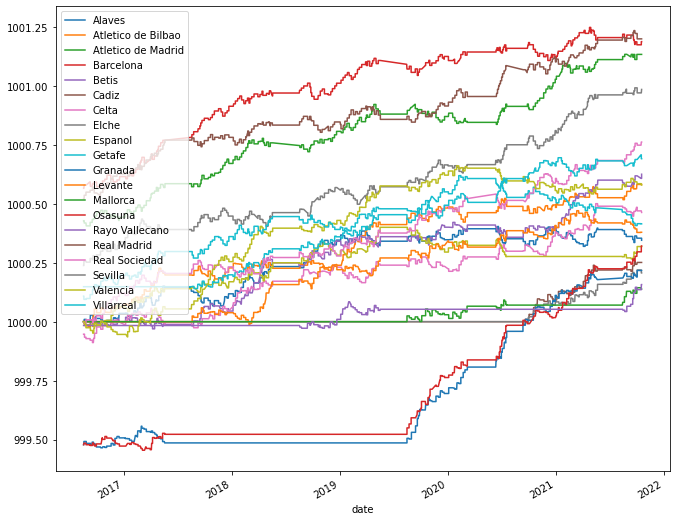

In [16]:
import numpy as np
rating_history = pd.DataFrame(model.output_['rating'],columns=elo_data.le_.classes_,index=pd.DatetimeIndex(elo_data.time)) [  np.unique(np.concatenate(data.loc[data.date>'2021-08-01',['home','away']].values))]
rating_history.plot(figsize=(11, 9.5))

In [7]:
pd.Series(model.predict_proba('Barcelona','Real Madrid'))

Barcelona      0.40907618
Draw           0.09897667
Real Madrid    0.49194714
dtype: object

In [8]:
pd.Series(model.predict_proba('Real Madrid','Barcelona'))

Real Madrid    0.49194714
Draw           0.09897667
Barcelona      0.40907618
dtype: object

In [9]:
pd.Series(model.predict_proba('Atletico de Bilbao', 'Villarreal'))

Atletico de Bilbao    0.41390944
Draw                  0.09913087
Villarreal            0.48695973
dtype: object

In [10]:
pd.Series(model.predict_proba('Valencia', 'Mallorca'))

Valencia    0.56554174
Draw        0.09454572
Mallorca    0.33991253
dtype: object